In [1]:
cd /scratch/tm70/as2285/experiments/archive/c_grid/output000

/scratch/tm70/as2285/experiments/archive/c_grid/output000


In [2]:
ll

total 1542944
-rw-r----- 1 as2285      1461 Feb  7 16:36 access-om3.err
-rw-r----- 1 as2285     25035 Feb  7 16:36 access-om3.out
-rw-r----- 1 as2285    154953 Feb  7 16:35 available_diags.000000
-rw-rw-r-- 1 as2285      1495 Feb  7 16:35 config.yaml
-rw-rw-r-- 1 as2285       440 Feb  7 16:35 datm_in
-rw-rw-r-- 1 as2285     84199 Feb  7 16:35 datm.streams.xml
-rw-rw-r-- 1 as2285     14257 Feb  7 16:35 diag_table
-rw-rw-r-- 1 as2285       249 Feb  7 16:35 drof_in
-rw-rw-r-- 1 as2285     18420 Feb  7 16:35 drof.streams.xml
-rw-rw-r-- 1 as2285       552 Feb  7 16:35 drv_in
-rw-r----- 1 as2285     18667 Feb  7 16:35 env.yaml
-rw-rw-r-- 1 as2285     39124 Feb  7 16:35 fd.yaml
-rw-r----- 1 as2285 115224960 Feb  7 16:36 GMOM_JRA.cice.h.1958-01-01.nc
-rw-r----- 1 as2285   6913676 Feb  7 16:36 GMOM_JRA.cpl.hx.ocn.24h.1958-01-02-00000.nc
-rw-r----- 1 as2285 475259444 Feb  7 16:36 GMOM_JRA.mom6.h.native_1958_01.nc
-rw-r----- 1 as2285   5217732 Feb  7 16:36 GMOM_JRA.mom6.h.sfc_1958_01.nc
-rw-r----

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Sanity Check CICE has stress terms from ocean interaction

In [4]:
cice_1_ds = xr.open_dataset('GMOM_JRA.cice.h.1958-01-01.nc')

0.3.0


In [5]:
cice_1_ds

<xarray.Dataset>
Dimensions:      (time: 1, nbnd: 2, nj: 300, ni: 360, nc: 5, nkice: 4,
                  nksnow: 1, nkbio: 3, nkaer: 5, nf: 12)
Coordinates:
  * time         (time) datetime64[ns] 1958-01-02
    TLON         (nj, ni) float64 ...
    TLAT         (nj, ni) float64 ...
    ULON         (nj, ni) float64 ...
    ULAT         (nj, ni) float64 ...
    NLON         (nj, ni) float64 ...
    NLAT         (nj, ni) float64 ...
    ELON         (nj, ni) float64 ...
    ELAT         (nj, ni) float64 ...
    NCAT         (nc) float64 ...
    NFSD         (nf) float64 ...
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer,
                                nf
Data variables: (12/55)
    time_bounds  (time, nbnd) datetime64[ns] ...
    VGRDi        (nkice) float64 ...
    VGRDs        (nksnow) float64 ...
    VGRDb        (nkbio) float64 ...
    VGRDa        (nkaer) float64 ...
    tmask        (nj, ni) float64 ...
    ...           ...
    strocnxE     (time, nj, ni) float64 ...
    strocnyE     (time, nj, ni) float64 ...
    dvidtt       (time, nj, ni) float64 ...
    dvidtd       (time, nj, ni) float64 ...
    aicen        (time, nc, nj, ni) float64 ...
    afsdn        (time, nc, nf, nj, ni) float64 ...
Attributes:
    title:               GMOM_JRA
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             This year has 365 days
    comment2:            File written on model date 19580102
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  end
    conventions:         CF-1.0
    history:             This dataset was created on 2024-02-07 at 16:36
    io_flavor:           io_pio2 hdf5
    deflate:             0

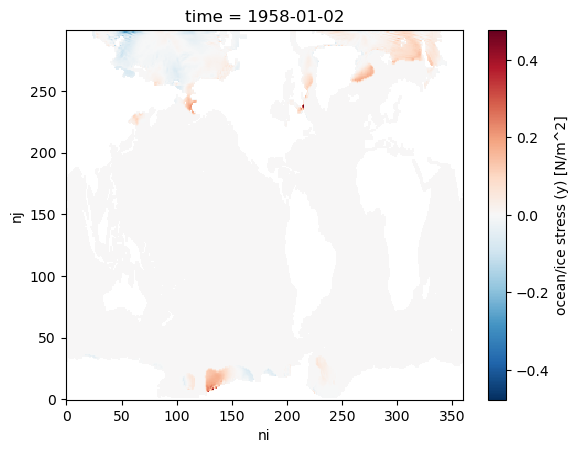

In [6]:
cice_1_ds.strocnyN.plot()

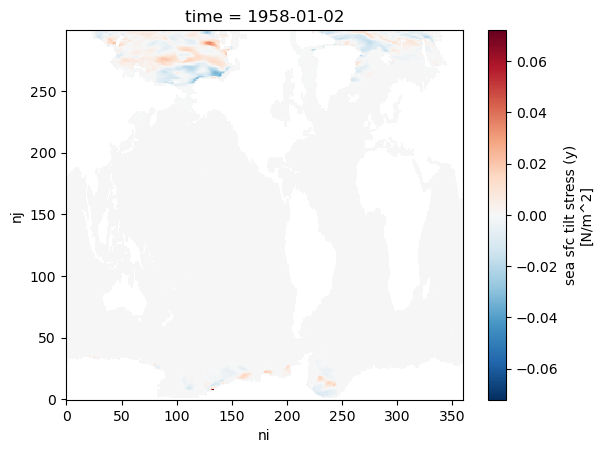

In [7]:
cice_1_ds.strtlty.plot()

# Compare coupled data to MOM restart

In [8]:
cpl_1_ds = xr.open_dataset('GMOM_JRA.cpl.hx.ocn.24h.1958-01-02-00000.nc')

In [9]:
cpl_1_ds

<xarray.Dataset>
Dimensions:            (time: 1, ntb: 2, ocnImp_ny: 300, ocnImp_nx: 360)
Coordinates:
  * time               (time) datetime64[ns] 1958-01-01T12:00:00
Dimensions without coordinates: ntb, ocnImp_ny, ocnImp_nx
Data variables:
    time_bnds          (time, ntb) float64 ...
    ocnImp_So_bldepth  (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_So_t        (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_So_u        (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_So_v        (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_So_dhdx     (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_So_dhdy     (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_lon         (time, ocnImp_ny, ocnImp_nx) float64 ...
    ocnImp_lat         (time, ocnImp_ny, ocnImp_nx) float64 ...
Attributes:
    file_version:   cmeps0
    model_doi_url:  unset

Sanity check

Surface vel

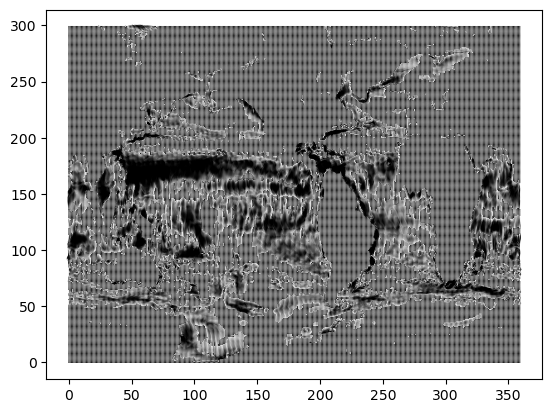

In [10]:
plt.quiver(
    cpl_1_ds['ocnImp_So_u'][0], cpl_1_ds['ocnImp_So_v'][0]
)

Surface tilt

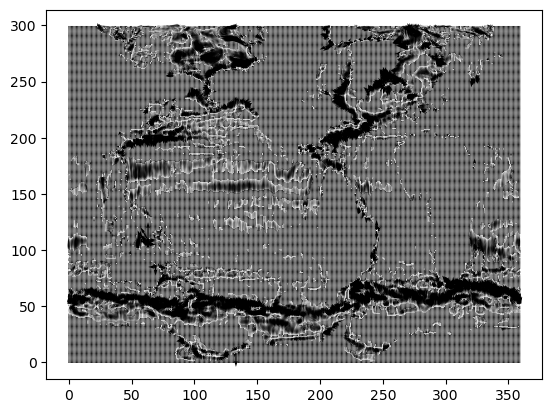

In [11]:
plt.quiver(
    cpl_1_ds['ocnImp_So_dhdx'][0], cpl_1_ds['ocnImp_So_dhdy'][0]
)

Same data from MOM6

In [12]:
mom_1_ds = xr.open_dataset('../restart000/GMOM_JRA.mom6.r.1958-01-02-00000.nc')

In [13]:
mom_1_ds

<xarray.Dataset>
Dimensions:           (lath: 300, lonh: 360, latq: 300, lonq: 360, Layer: 50,
                       Interface: 51, Time: 1)
Coordinates:
  * lath              (lath) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * lonh              (lonh) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * latq              (latq) float64 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
  * lonq              (lonq) float64 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * Layer             (Layer) float64 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
  * Interface         (Interface) float64 0.0 2.303 4.994 ... 5.144e+03 6e+03
  * Time              (Time) timedelta64[ns] 74268 days 01:16:18.871345152
Data variables: (12/32)
    Temp              (Time, Layer, lath, lonh) float64 ...
    Salt              (Time, Layer, lath, lonh) float64 ...
    h                 (Time, Layer, lath, lonh) float64 ...
    u                 (Time, Layer, lath, lonq) float64 ...
    v                 (Time, Layer, latq, lonh) float64 ...
    frazil            (Time, lath, lonh) float64 ...
    ...                ...
    MEKE_Kh           (Time, lath, lonh) float64 ...
    MEKE_Ku           (Time, lath, lonh) float64 ...
    MEKE_Kh_diff      (Time, lath, lonh) float64 ...
    Kd_shear          (Time, Interface, lath, lonh) float64 ...
    Kv_shear          (Time, Interface, lath, lonh) float64 ...
    MLD_MLE_filtered  (Time, lath, lonh) float64 ...
Attributes:
    filename:  ./GMOM_JRA.mom6.r.1958-01-02-00000.nc

In [14]:
mom_1_ds.u.isel(Layer=0)[0].equals(cpl_1_ds['ocnImp_So_u'][0])

False

In [15]:
mom_1_ds.u.isel(Layer=0)[0]

<xarray.DataArray 'u' (lath: 300, lonq: 360)>
[108000 values with dtype=float64]
Coordinates:
  * lath     (lath) float64 -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * lonq     (lonq) float64 -279.0 -278.0 -277.0 -276.0 ... 77.0 78.0 79.0 80.0
    Layer    float64 1.152
    Time     timedelta64[ns] 74268 days 01:16:18.871345152
Attributes:
    long_name:  Zonal velocity
    units:      m s-1
    checksum:   13C20D56E1BF8019

In [16]:
cpl_1_ds['ocnImp_So_u'][0]

<xarray.DataArray 'ocnImp_So_u' (ocnImp_ny: 300, ocnImp_nx: 360)>
[108000 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 1958-01-01T12:00:00
Dimensions without coordinates: ocnImp_ny, ocnImp_nx
Attributes:
    units:          m s-1
    standard_name:  ocnImp_So_u

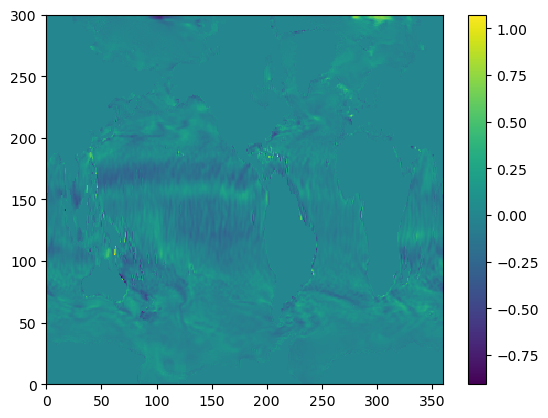

In [17]:
plt.pcolor(mom_1_ds.u.isel(Layer=0)[0].values-cpl_1_ds['ocnImp_So_u'][0].values)
plt.colorbar()

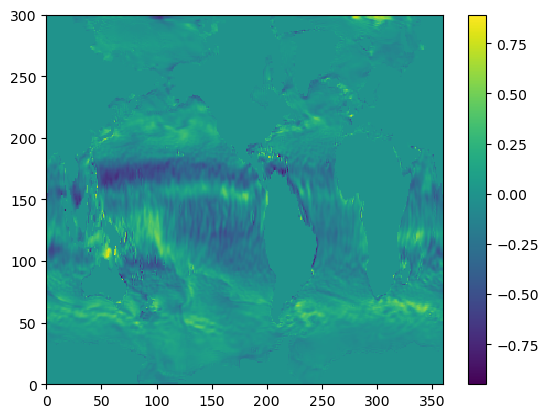

In [18]:
plt.pcolor(mom_1_ds.u.isel(Layer=0)[0])
plt.colorbar()

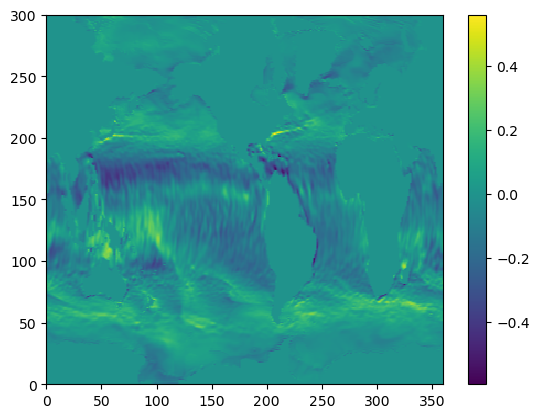

In [19]:
plt.pcolor(cpl_1_ds['ocnImp_So_u'][0].values)
plt.colorbar()

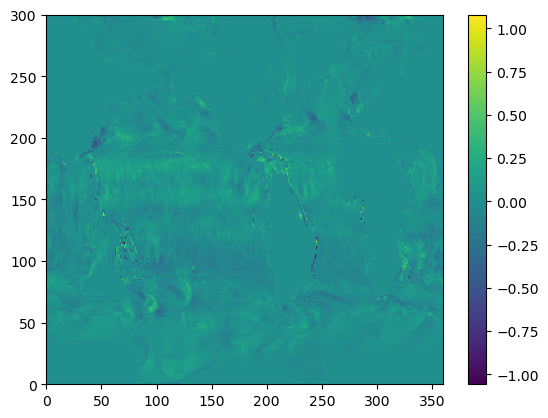

In [20]:
plt.pcolor(mom_1_ds.v.isel(Layer=0)[0].values-cpl_1_ds['ocnImp_So_v'][0].values)
plt.colorbar()

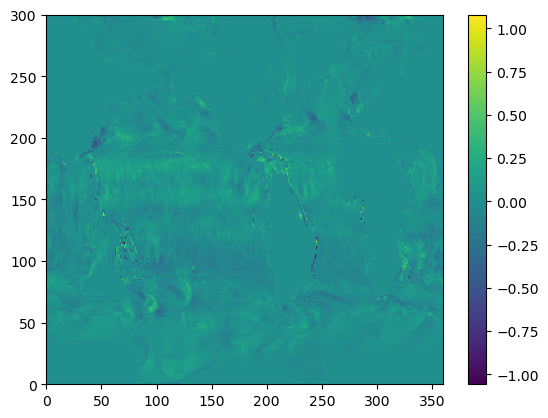

In [21]:
plt.pcolor(mom_1_ds.v.isel(Layer=0)[0].values-cpl_1_ds['ocnImp_So_v'][0].values)
plt.colorbar()

In [22]:
ds=xr.open_dataset('GMOM_JRA.mom6.h.sfc_1958_01.nc')

In [23]:
ds

<xarray.Dataset>
Dimensions:       (xh: 360, yh: 300, time: 1, nv: 2, xq: 360, yq: 300)
Coordinates:
  * xh            (xh) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yh            (yh) float64 -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * time          (time) datetime64[ns] 1957-12-30T12:00:00
  * nv            (nv) float64 1.0 2.0
  * xq            (xq) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yq            (yq) float64 -77.75 -77.51 -77.26 -77.01 ... 89.1 89.55 90.0
Data variables: (12/16)
    SSH           (time, yh, xh) float32 ...
    tos           (time, yh, xh) float32 ...
    sos           (time, yh, xh) float32 ...
    SSU           (time, yh, xq) float32 ...
    SSV           (time, yq, xh) float32 ...
    mass_wt       (time, yh, xh) float32 ...
    ...            ...
    mlotst        (time, yh, xh) float32 ...
    oml           (time, yh, xh) float32 ...
    average_T1    (time) datetime64[ns] ...
    average_T2    (time) datetime64[ns] ...
    average_DT    (time) timedelta64[ns] ...
    time_bnds     (time, nv) datetime64[ns] ...
Attributes:
    NumFilesInSet:     1
    title:             MOM6 diagnostic fields table for CESM case: GMOM_JRA
    associated_files:  areacello: GMOM_JRA.mom6.h.static.nc
    grid_type:         regular
    grid_tile:         N/A

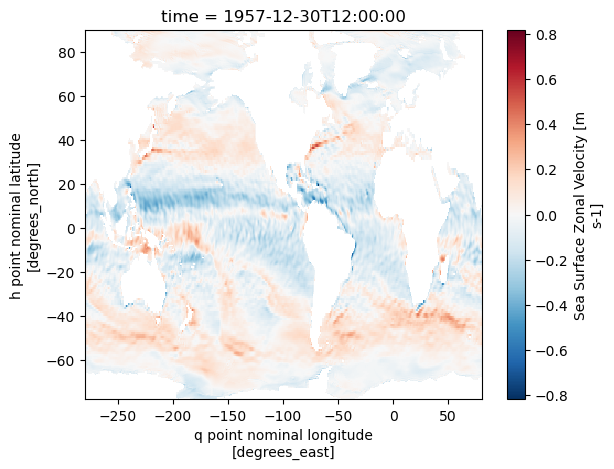

In [24]:
ds.SSU.plot()

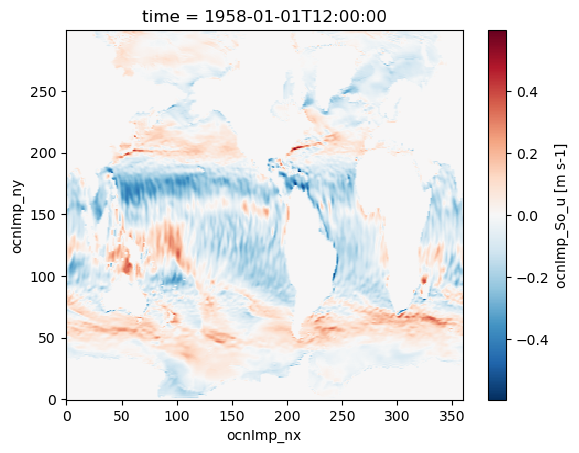

In [25]:
cpl_1_ds['ocnImp_So_u'][0].plot()

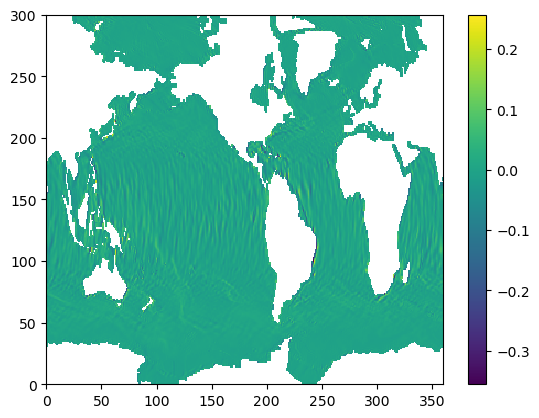

In [26]:
plt.pcolor((ds.SSU[0].values-cpl_1_ds['ocnImp_So_u'][0].values))
plt.colorbar()

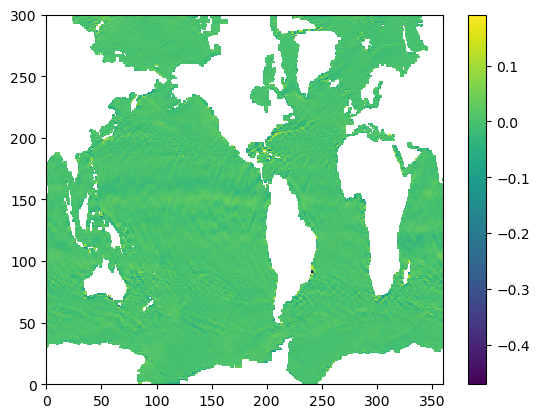

In [27]:
plt.pcolor((ds.SSV[0].values-cpl_1_ds['ocnImp_So_v'][0].values)) #, vmin=-0.012, vmax=0.012)
plt.colorbar()

In [28]:
cgrid_u_mom=(ds.SSU[0].values[:,0:-1]+ds.SSU[0].values[:,1:])/2

In [29]:
diff_u=((ds.SSU[0].values[:,0:-1]+ds.SSU[0].values[:,1:])/2-cpl_1_ds['ocnImp_So_u'][0].values[:,1:])

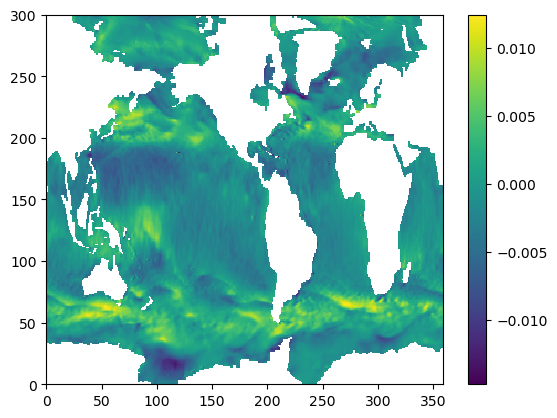

In [30]:
plt.pcolor(diff_u)
plt.colorbar()

(array([[0., 0., 0., ..., 3., 0., 0.],
        [0., 0., 0., ..., 3., 0., 0.],
        [0., 0., 0., ..., 4., 0., 0.],
        ...,
        [0., 0., 0., ..., 4., 0., 0.],
        [0., 0., 0., ..., 3., 0., 0.],
        [0., 0., 0., ..., 4., 0., 0.]]),
 array([-0.01473746, -0.01201876, -0.00930006, -0.00658135, -0.00386265,
        -0.00114395,  0.00157475,  0.00429345,  0.00701215,  0.00973085,
         0.01244955]),
 <a list of 359 BarContainer objects>)

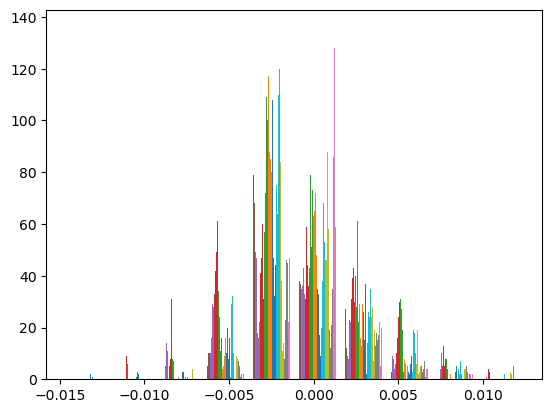

In [31]:
plt.hist(diff_u[0:240,:])

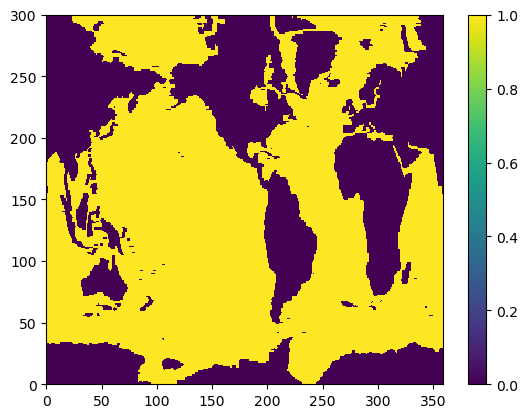

In [32]:
plt.pcolor(
    np.logical_and(diff_u<0.01, diff_u>-0.01)
)
plt.colorbar()